# Project 1: Research Design Write-Up
## Admissions Dataset
## Due Date: Lesson 5, September 17, 2016

### Read and evaluate the following problem statement: 
Determine which free-tier customers will covert to paying customers, using demographic data collected at signup (age, gender, location, and profession) and customer useage data (days since last log in, and activity score 1 = active user, 0= inactive user) based on Hooli data from Jan-Apr 2015. 

#### 1. What is the outcome?

Answer: The outcome is a list of free-tier customers who convert to paying customers.

#### 2. What are the predictors/covariates? 

Answer: The predictors includes demographic data that was obtained when the user signedup, and the usage data of each customer.

#### 3. What timeframe is this data relevent for?

Answer: The time frame is January 2015 to April 2015.

#### 4. What is the hypothesis?

Answer: From the problem statement, one can infer that a business owner would like to know what factors (demographics and usage) would serve as the best predictors for customer tier conversion. One may hypothesize that a customer who uses the site frequently would more than likely convert to a paid tier than one who does not. Also, one could postulate that professionals (wealth implied) would convert more often than those in other vocations.

## Let's get started with our dataset

#### 1. Create a data dictionary 

Answer: 

Variable | Description | Type of Variable
---| ---| ---
admit | admitted, yes (1) or no (0)  | categorical (binary)
gre | GRE score | continuous
gpa | Grade point average | continuous 
prestige | Tier of the previous school | categorical

We would like to explore the association between X and Y 

#### 2. What is the outcome?

Answer: The outcome is the acceptance (1) or rejection (0) of a student to a graduate program.

#### 3. What are the predictors/covariates? 

Answer:  The predictors in this data set are the grade point average (GPA), GRE score, and prestige of the student's undergraduate school.

#### 4. What timeframe is this data relevent for?

Answer: This data refers to information provided by the student for an application. Per UCLA's "Logistic Regression in R" website (http://www.ats.ucla.edu/stat/r/dae/logit.htm), the data set is hypothetical. Within both contexts, the data is cross sectional since it provides a snapshot of an applicant pool for one application cycle.

#### 4. What is the hypothesis?

Answer: Those admitted tend to have high GRE scores, high GPAs, and come from prestigious schools.

## Problem Statement

### Exploratory Analysis Plan

Using the lab from a class as a guide, create an exploratory analysis plan. 

#### 1. What are the goals of the exploratory analysis? 

Answer: The goals of exploratory analysis is to summarize key features of the data set using descriptive statistics and graphs before advanced statistical and modeling techniques are used. The exploratory analysis phase of a project identifies properties of the data set that will be used in a predictive model.

#### 2a. What are the assumptions of the distribution of data? 

Answer: Some common assumptions of large data sets includes the continuity of non-categorical variables and normality of the distribution (assumed under the central limit theorem). From the normality assumption, one can hypothesize the skewness and kurtosis of a distribution.

#### 2b. How will determine the distribution of your data? 

Answer: The distribution can be determined using statistical tests such as the a two-sample Kolmogorov-Smirnov (ks) test between the predictor's distribution and a normal distribution with a mean equal to that of the predictor. Other characterisitics of normality (or lack thereof) can be interpreted from the mean, median, and mode of the predictor's distribution and via functions (e.g. stats.kurtosis, stats.skew, and kstest) in Python.

(See appendix below)

#### 3a. How might outliers impact your analysis? 

Answer: Outliers may skew the distribution of the data. As a consequence, the variance would be high and the "true" mean of the distribution will be shifted towards the outliers.

#### 3b. How will you test for outliers? 

Answer: The presence of outliers can be confirmed by interquartile ranges (IQR). A value is considered an outlier if it is 1.5xIQR below the first quartile or 1.5xIQR above the third quartile. Outliers can be visually assessed via boxplots.

(See appendix below)

#### 4a. What is colinearity? 

Answer: Colinearity occurs when two or more variables are highly correlated. The outcome of one variable can be predicted in a linear manner from another variable.

#### 4b. How will you test for colinearity? 

Answer: Colinearity can be tested by measuring the covarience or correlation coefficients between variables. Also, one could examine the goodness of fit following linear regression using the variables.

(See appendix below)

#### 5. What is your exploratory analysis plan?
Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis 1 year from now. 

Answer: See appendix below

## Bonus Questions:
1. Outline your analysis method for predicting your outcome
2. Write an alternative problem statement for your dataset
3. Articulate the assumptions and risks of the alternative model

# Appendix

This section includes the code that is neccessary to demonstrate some of the answers provided above.
### Part I: Loading and cleaning data

In [168]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.stats import stats, levene, kstest, ks_2samp

#Allow plots to appear inline with code
%matplotlib inline

#Read in CSV file
admin = pd.read_csv('admissions.csv')

#Find and store column names, store size of data set
colNames = list(admin.columns.values)
rows = admin.shape[0]
cols = admin.shape[1]

#Print data
print 'Number of rows: ' + str(rows)
print 'Number of columns: ' + str(cols)
print 'Column names: ' + '[%s]' % ', '.join(map(str,colNames))

#From looking at the top 5 entries, we see that all values are mostlikely numeric.
#To confirm the above assumption:
print admin.head()
print '\nData types of each column:\n' + str(admin.dtypes) + '\n'

#Check for uniqueness of values in each column
#See if any variables are categorical, continuous/ discrete
for i in range(len(colNames)):
    vals = admin[colNames[i]].unique()
    numNans = admin[colNames[i]].isnull().sum()   
    print colNames[i] + ': ' + str(len(vals)) + ' unique values and ' + str(numNans) + ' NaNs'

Number of rows: 400
Number of columns: 4
Column names: [admit, gre, gpa, prestige]
   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0

Data types of each column:
admit         int64
gre         float64
gpa         float64
prestige    float64
dtype: object

admit: 2 unique values and 0 NaNs
gre: 27 unique values and 2 NaNs
gpa: 133 unique values and 2 NaNs
prestige: 5 unique values and 1 NaNs


#### Note: The data for a few applicants are not complete. Complete rows were used for the remainder of this document.

In [169]:
#remove rows with NaN
admin2 = admin.dropna()

for i in range(len(colNames)):
   vals = admin2[colNames[i]].unique()
   numNans = admin2[colNames[i]].isnull().sum()
   print colNames[i] + ': ' + str(len(vals)) + ' unique values and ' + str(numNans) + ' NaNs'

admit: 2 unique values and 0 NaNs
gre: 26 unique values and 0 NaNs
gpa: 131 unique values and 0 NaNs
prestige: 4 unique values and 0 NaNs


From the project description and the code book found on the UCLA webpage, we know that column "admit" is categorical with only two possible values, "prestige" has 5 possible values, and "gre" and "gpa" are continuous variables that cover a spectrum of values within a set range. There are also missing values in all columns except "admit".

In our case, "admit" is the outcome while the remaining three columns are predictors.

### Part II: Descriptive Statistics
To get a feel for the data set, the mean, standard deviation, and quartiles were computed. I assumed there would be some relationship between the following variables and paired their analysis accordingly:
- gpa, gre: Students with high GPAs tend to score well on the GREs.
- gpa or gre, admit: Students with high GPAs or GREs are more likely to be admitted.
- presitege, admit: Students from presitgious undergrads are more likely to be admitted.
- gpa or gre, prestige: Students from prestigious undergrads are more likely to score well on the GREs and/ or have high GPAs.

Overall, the applicant pool had an average GPA that was above the national average of 3.11 (http://www.usatoday.com/story/news/nation/2013/11/21/college-grade-inflation-what-does-an-mean/3662003/). 25% of the GPAs were around the national average.

In [170]:
print admin2.describe()
print '\nMean GRE: ' + str((admin2.gre.min() + admin2.gre.max())/2)
print 'Mean GPA: ' + str((admin2.gpa.min() + admin2.gpa.max())/2)

            admit         gre         gpa    prestige
count  397.000000  397.000000  397.000000  397.000000
mean     0.317380  587.858942    3.392242    2.488665
std      0.466044  115.717787    0.380208    0.947083
min      0.000000  220.000000    2.260000    1.000000
25%      0.000000  520.000000    3.130000    2.000000
50%      0.000000  580.000000    3.400000    2.000000
75%      1.000000  660.000000    3.670000    3.000000
max      1.000000  800.000000    4.000000    4.000000

Mean GRE: 510.0
Mean GPA: 3.13


The average GRE of the admitted group was higher than that of the rejected group. A considerable portion (75%) of the GRE for both groups sits well below the max values which indicates the presence of an outlier. Both distributions are skewed towards the right (skewness measure < 0, per the documentation). As a consequence, these distributions are likely not normal.

Also, a comparison between the average GRE score across the rank of the undergraduate institution of the students suggests a positive relationship between GRE score and school prestige (higher GRE score for more prestigious schools). The distributions for all ranks except the highest rank may be skewed (skewness measure != 0).

(Below)

In [189]:
#Summary statistics
print admin2.gre.groupby(admin2.admit).describe()
print admin2.gre.groupby(admin2.prestige).describe()

#Kurtosis measure
print stats.kurtosis(admin2.gpa[admin2.admit == 0])
print stats.kurtosis(admin2.gpa[admin2.admit == 1])
print stats.kurtosis(admin2.gre[admin2.admit == 0])
print stats.kurtosis(admin2.gre[admin2.admit == 1])

#Skewness measure
print stats.skew(admin2.gpa[admin2.admit == 0])
print stats.skew(admin2.gpa[admin2.admit == 1])
print stats.skew(admin2.gre[admin2.admit == 0])
print stats.skew(admin2.gre[admin2.admit == 1])

admit       
0      count    271.000000
       mean     573.579336
       std      116.052798
       min      220.000000
       25%      500.000000
       50%      580.000000
       75%      660.000000
       max      800.000000
1      count    126.000000
       mean     618.571429
       std      109.257233
       min      300.000000
       25%      540.000000
       50%      620.000000
       75%      680.000000
       max      800.000000
Name: gre, dtype: float64
prestige       
1.0       count     61.000000
          mean     611.803279
          std      120.242924
          min      340.000000
          25%      540.000000
          50%      600.000000
          75%      700.000000
          max      800.000000
2.0       count    148.000000
          mean     596.621622
          std      107.371528
          min      300.000000
          25%      520.000000
          50%      600.000000
          75%      665.000000
          max      800.000000
3.0       count    121.000000
   

On average, the GPA of the admitted group was larger than that of the rejected group. There does not appear to be an obvious relationship between the prestige of the school and GPA.

In [172]:
print admin2.gpa.groupby(admin2.admit).describe()
print admin2.gpa.groupby(admin2.prestige).describe()

admit       
0      count    271.000000
       mean       3.347159
       std        0.376355
       min        2.260000
       25%        3.080000
       50%        3.340000
       75%        3.610000
       max        4.000000
1      count    126.000000
       mean       3.489206
       std        0.371655
       min        2.420000
       25%        3.220000
       50%        3.545000
       75%        3.757500
       max        4.000000
Name: gpa, dtype: float64
prestige       
1.0       count     61.000000
          mean       3.453115
          std        0.390698
          min        2.420000
          25%        3.200000
          50%        3.530000
          75%        3.730000
          max        4.000000
2.0       count    148.000000
          mean       3.367365
          std        0.375248
          min        2.420000
          25%        3.117500
          50%        3.385000
          75%        3.630000
          max        4.000000
3.0       count    121.000000
   

### Part III: Graphical Representation of Descriptive Statistics
Boxplots were used to graphically summarize the findings in section 1. Swarm plots were added to help visualize the distribution of the data.

There are very few outliers (with respect to the size of each group). As a result, the IQR outlier calculation was not performed.

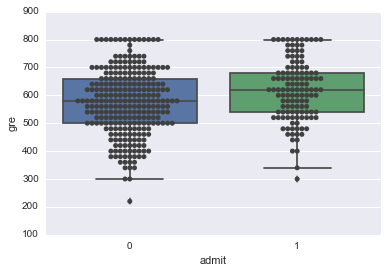

In [173]:
#Boxplot of GRE for the rejected and accepted groups
p1 = sb.boxplot(y='gre',x='admit',data=admin2)
p1 = sb.swarmplot(x='admit', y='gre', data=admin2, color=".25")

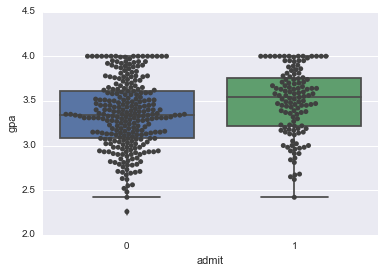

In [174]:
#Boxplot of GPA for the rejected and accepted groups
p2 = sb.boxplot(y='gpa',x='admit',data=admin2)
p2 = sb.swarmplot(x='admit', y='gpa', data=admin2, color=".25")

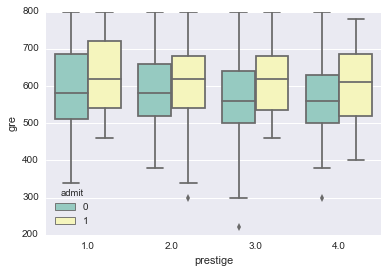

In [175]:
#Boxplot of GRE for each school rank
sb.boxplot(y='gre',x='prestige',data=admin2,hue='admit',palette='Set3')

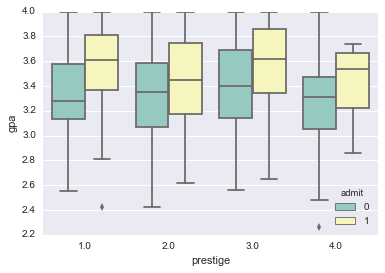

In [176]:
#Boxplot of GPA for each school rank
sb.boxplot(y='gpa',x='prestige',data=admin2,hue='admit',palette='Set3')

### PartIV: Statistical Significance
Above, the data suggests there is a difference between the following variables:
- The mean of 'gpa' for the rejected and admitted groups
- The mean of 'gre' for the rejected and admitted groups
- The mean of 'gre' across school rank for the admitted group

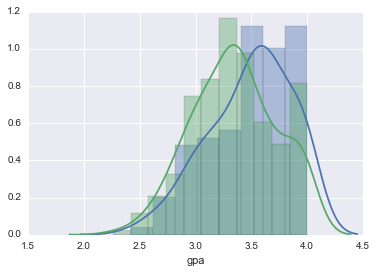

In [177]:
sb.distplot(admin2.gpa[admin2.admit == 1])
sb.distplot(admin2.gpa[admin2.admit == 0])

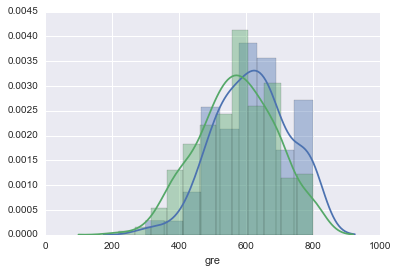

In [178]:
sb.distplot(admin2.gre[admin2.admit == 1])
sb.distplot(admin2.gre[admin2.admit == 0])

Graphically, neither group appears to be normal (above). Statistically, the 'gre'/'gpa' variables are not normal (see below, p < 0.05). The kstest was used to determine if 'gre'/'gpa' and a normal distribution with the same statisitcs as 'gre'/'gpa' could be pulled from the same continuous distribution. The p-values are less than 0.05, so the null hypothesis (distributions are the same) was rejected (distributions are not normal).

In [190]:
print kstest(admin2.gpa[admin2.admit == 0],'norm')
print kstest(admin2.gpa[admin2.admit == 1],'norm')
print kstest(admin2.gre[admin2.admit == 0],'norm')
print kstest(admin2.gre[admin2.admit == 1],'norm')

KstestResult(statistic=0.98854970954907739, pvalue=0.0)
KstestResult(statistic=0.99223974644944635, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)


Since the groups are not normal, I used the KS-test to determine if the 'gre' and 'gpa' distributions between the rejected and accepted groups were similar (null hypothesis: samples are pulled from the same distribution/ the distributions are similar).

In [180]:
print ks_2samp(admin2.gre[admin2.admit == 0],admin2.gre[admin2.admit == 1])
print ks_2samp(admin2.gpa[admin2.admit == 0],admin2.gpa[admin2.admit == 1])

Ks_2sampResult(statistic=0.17199671996719962, pvalue=0.01065805573851842)
Ks_2sampResult(statistic=0.23695308381655239, pvalue=9.6900343454735718e-05)


The p-values are less than 0.05, so the null hypothesis is rejected. The distributions of the rejected and accepted groups are statistically different for both 'gre' and 'gpa'.

Student t-tests were performed. Although the distribtions are not normal, the size of each variable may be large enough for the t-test to be used. Since we know that the variances are the same (via Levene's test, see below), the arguments for the t-test were changed accordingly. The null hypothesis states that the means of the two distributions are the same.

In [181]:
#Null hypothesis: variances are the same
print levene(admin2.gpa[admin2.admit == 0],admin2.gpa[admin2.admit == 1])
print levene(admin2.gre[admin2.admit == 0],admin2.gre[admin2.admit == 1])
#p-value > 0.05, accept the null hypothesis. variances are the same

print '\n'
print stats.ttest_ind(admin2.gpa[admin2.admit == 0],admin2.gpa[admin2.admit == 1],equal_var=True)
print stats.ttest_ind(admin2.gre[admin2.admit == 0],admin2.gre[admin2.admit == 1],equal_var=True)

LeveneResult(statistic=0.023752749753677232, pvalue=0.87759440488177543)
LeveneResult(statistic=0.55252684303017385, pvalue=0.45772893786137236)


Ttest_indResult(statistic=-3.5141732847816929, pvalue=0.00049220860020320956)
Ttest_indResult(statistic=-3.661940006859044, pvalue=0.00028438035728739171)


The p-values are less than 0.05, so the null hypothesis is rejected. The means of the admitted and rejected groups are statistically different for both 'gre' and 'gpa'.

### Part V: Correlations
Next, linearity between 'gre' and 'gpa' was examined graphically and quantitatively. Since these two variables are continuous, they are well suited to assess linearity graphically.

Visually, 'gre' and 'gpa' are linearly related across the rejected and admitted groups. 'gre' increases with increasing 'gpa'.

Quantitatively, 'gre' and 'gpa' are the most correlated variables in the data set.

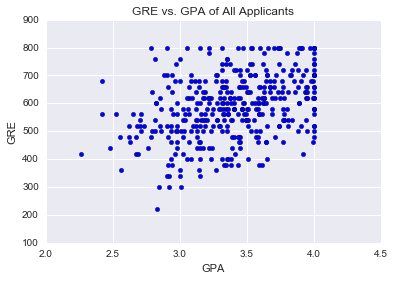

In [191]:
#Scatter of all applicants
plt.scatter(admin2['gpa'],admin2['gre'])
plt.ylabel('GRE')
plt.xlabel('GPA')
plt.title('GRE vs. GPA of All Applicants')
plt.show()

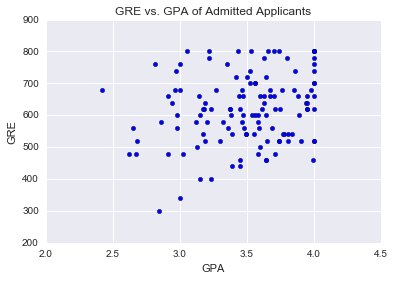

In [192]:
#Scatter of admitted applicants
plt.scatter(admin2.gpa[admin2.admit==1],admin2.gre[admin2.admit==1])
plt.ylabel('GRE')
plt.xlabel('GPA')
plt.title('GRE vs. GPA of Admitted Applicants')
plt.show()

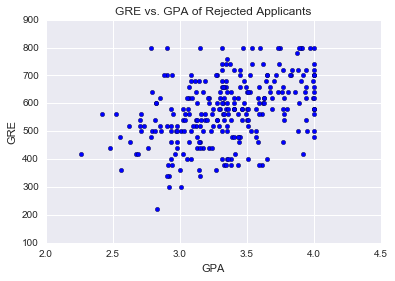

In [193]:
#Scatter of rejected applicants
plt.scatter(admin2.gpa[admin2.admit==0],admin2.gre[admin2.admit==0])
plt.ylabel('GRE')
plt.xlabel('GPA')
plt.title('GRE vs. GPA of Rejected Applicants')
plt.show()

In [194]:
#Correlation coefficients across all variables
admin2.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


### Extra: Statistical Analysis, Prestige
Earlier, box plots and descriptive statistics suggested the presence of a relationship between the prestige of the undergraduate school and GRE. GRE scores decrease with decreasing undergraduate school rank.

Below, the normality of subgroups in 'gre' defined by undergraduate rank was examined. The p-values for all subgroups was less than 0.05, which means the null hypothesis (the distributions are the same) can be rejected. As a consequence, the subgroups are not normally distributed.

Histograms of each subgroup along with the statistics above suggest these subgroups are not normally distributed.

KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)


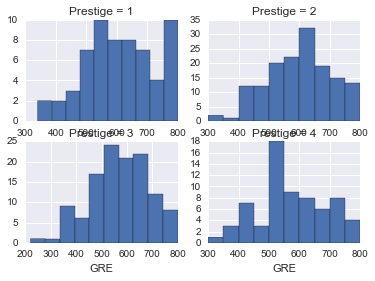

In [186]:
print kstest(admin2.gre[admin2.prestige == 1],'norm')
print kstest(admin2.gre[admin2.prestige == 2],'norm')
print kstest(admin2.gre[admin2.prestige == 3],'norm')
print kstest(admin2.gre[admin2.prestige == 4],'norm')

plt.subplot(2,2,1)
plt.hist(admin2.gre[admin2.prestige == 1])
plt.title('Prestige = 1')
plt.xlabel('GRE')

plt.subplot(2,2,2)
plt.hist(admin2.gre[admin2.prestige == 2])
plt.title('Prestige = 2')
plt.xlabel('GRE')

plt.subplot(2,2,3)
plt.hist(admin2.gre[admin2.prestige == 3])
plt.title('Prestige = 3')
plt.xlabel('GRE')

plt.subplot(2,2,4)
plt.hist(admin2.gre[admin2.prestige == 4])
plt.title('Prestige = 4')
plt.xlabel('GRE')

Next, significance between the distributions of each subgroup across the admitted and rejected classes was examined using two-sample ks-test. The p-value is greater than 0.05, so the null hypothesis cannot be rejected. 

In [187]:
#p1 vs. p2-4
a = admin2.gre[(admin2.prestige == 1) & (admin2.admit == 1)]
for i in range(1,5):
    b = admin2.gre[(admin2.prestige == i) & (admin2.admit == 1)]
    print ks_2samp(a,b)[1]

#p2 vs. p3-4    
a = admin2.gre[(admin2.prestige == 2) & (admin2.admit == 1)]
for i in range(3,5):
    b = admin2.gre[(admin2.prestige == i) & (admin2.admit == 1)]
    print ks_2samp(a,b)[1]
    
#p3 vs. p4
a = admin2.gre[(admin2.prestige == 3) & (admin2.admit == 1)]
b = admin2.gre[(admin2.prestige == 4) & (admin2.admit == 1)]
ks_2samp(a,b)[1]

1.0
0.666871094786
0.631026465533
0.903703286776
0.994927270491
0.990579476143


0.99716994129882996

The subgroups are not normal. They are also not large enough to examine using the t-test. Instead, the Mann-Whitney U test was performed to compare the medians of each group where the size of the group was >20 (per the documentation on docs.scipy.org).

In [188]:
#Determine size of each subgroup
for i in range(1,5):
    print 'Size P' + str(i) + ': ' + str(admin2.gre[(admin2.prestige == i) & (admin2.admit == 1)].describe()[0])

#Mann-Whitney U test
a = admin2.gre[(admin2.prestige == 1) & (admin2.admit == 1)]
for i in range(1,4):
    b = admin2.gre[(admin2.prestige == i) & (admin2.admit == 1)]
    print stats.mannwhitneyu(a,b)
    
a = admin2.gre[(admin2.prestige == 2) & (admin2.admit == 1)]
for i in range(3,4):
    b = admin2.gre[(admin2.prestige == i) & (admin2.admit == 1)]
    print stats.mannwhitneyu(a,b)

Size P1: 33.0
Size P2: 53.0
Size P3: 28.0
Size P4: 12.0
MannwhitneyuResult(statistic=544.5, pvalue=0.4974272302724615)
MannwhitneyuResult(statistic=801.0, pvalue=0.25790681655547726)
MannwhitneyuResult(statistic=415.5, pvalue=0.25210198604997403)
MannwhitneyuResult(statistic=738.5, pvalue=0.48808608523967262)


The p-value is greater than 0.05 for every median comparison, so the null hypothesis cannot be rejected.